# Fase 5: Evaluación - CRISP-DM

## Objetivo
Evaluar los modelos de clasificación y regresión entrenados, comparar resultados, validar con objetivos de negocio y seleccionar los mejores modelos para producción.

## Contenido
1. **Carga de Métricas**: Clasificación y Regresión
2. **Análisis Comparativo**: Tablas y visualizaciones
3. **Selección de Mejores Modelos**: Criterios de decisión
4. **Validación con Objetivos de Negocio**: Cumplimiento de objetivos
5. **Reporte de Experimentos**: Conclusiones técnicas
6. **Recomendaciones**: Para despliegue (Fase 6)


## 1. Importar Librerías y Cargar Datos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuración
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print('✅ Librerías importadas')


✅ Librerías importadas


In [2]:
# Cambiar al directorio del proyecto
import os
os.chdir(r'C:\Users\mathi\OneDrive\Escritorio\Proyecto kedro\ev1MachineL')

# Cargar métricas de clasificación
with open('data/06_models/classification_metrics.json', 'r', encoding='utf-8') as f:
    classification_metrics = pd.DataFrame(json.load(f))

# Cargar métricas de regresión
with open('data/06_models/regression_metrics.json', 'r', encoding='utf-8') as f:
    regression_metrics = pd.DataFrame(json.load(f))

print('✅ Métricas cargadas')
print(f'\nClasificación: {len(classification_metrics)} modelos')
print(f'Regresión: {len(regression_metrics)} modelos')


✅ Métricas cargadas

Clasificación: 5 modelos
Regresión: 5 modelos


## 2. Análisis Comparativo de Modelos


In [3]:
print('='*80)
print('📊 ANÁLISIS COMPARATIVO - CLASIFICACIÓN')
print('='*80)
print(classification_metrics.round(4))

# Mejor modelo de clasificación
best_clf_idx = classification_metrics['F1_Score'].idxmax()
best_clf = classification_metrics.iloc[best_clf_idx]

print(f'\n🏆 MEJOR MODELO DE CLASIFICACIÓN: {best_clf["Model"]}')
print(f'   - Accuracy: {best_clf["Accuracy"]:.4f}')
print(f'   - Precision: {best_clf["Precision"]:.4f}')
print(f'   - Recall: {best_clf["Recall"]:.4f}')
print(f'   - F1-Score: {best_clf["F1_Score"]:.4f}')
print(f'   - CV Mean: {best_clf["CV_Mean"]:.4f} ± {best_clf["CV_Std"]:.4f}')


📊 ANÁLISIS COMPARATIVO - CLASIFICACIÓN
                 Model  Accuracy  Precision  Recall  F1_Score  CV_Mean  CV_Std
0  Logistic_Regression    0.6669     0.8389  0.6669    0.7188   0.6724  0.0022
1        Random_Forest    0.7389     0.8271  0.7389    0.7715   0.7839  0.0413
2          Extra_Trees    0.7044     0.8316  0.7044    0.7471   0.7503  0.0290
3    Gradient_Boosting    0.7531     0.8295  0.7531    0.7819   0.7703  0.0473
4              XGBoost    0.7567     0.8271  0.7567    0.7838   0.7782  0.0472

🏆 MEJOR MODELO DE CLASIFICACIÓN: XGBoost
   - Accuracy: 0.7567
   - Precision: 0.8271
   - Recall: 0.7567
   - F1-Score: 0.7838
   - CV Mean: 0.7782 ± 0.0472


In [4]:
print('='*80)
print('📊 ANÁLISIS COMPARATIVO - REGRESIÓN')
print('='*80)
print(regression_metrics.round(4))

# Mejor modelo de regresión
best_reg_idx = regression_metrics['R2_Score'].idxmax()
best_reg = regression_metrics.iloc[best_reg_idx]

print(f'\n🏆 MEJOR MODELO DE REGRESIÓN: {best_reg["Model"]}')
print(f'   - R² Score: {best_reg["R2_Score"]:.4f}')
print(f'   - RMSE: {best_reg["RMSE"]:.4f}')
print(f'   - MAE: {best_reg["MAE"]:.4f}')
print(f'   - CV RMSE: {best_reg["CV_RMSE_Mean"]:.4f} ± {best_reg["CV_RMSE_Std"]:.4f}')


📊 ANÁLISIS COMPARATIVO - REGRESIÓN
               Model  R2_Score    RMSE     MAE     MSE  CV_RMSE_Mean  \
0  Linear_Regression    0.3776  0.3511  0.2621  0.1233        0.3430   
1      Decision_Tree    0.3626  0.3553  0.2615  0.1262        0.3440   
2      Random_Forest    0.4358  0.3343  0.2467  0.1117        0.3261   
3                KNN    0.3899  0.3476  0.2594  0.1208        0.3387   
4              Ridge    0.3766  0.3514  0.2620  0.1235        0.3433   

   CV_RMSE_Std  
0       0.0024  
1       0.0028  
2       0.0034  
3       0.0042  
4       0.0025  

🏆 MEJOR MODELO DE REGRESIÓN: Random_Forest
   - R² Score: 0.4358
   - RMSE: 0.3343
   - MAE: 0.2467
   - CV RMSE: 0.3261 ± 0.0034


## 3. Visualizaciones Comparativas


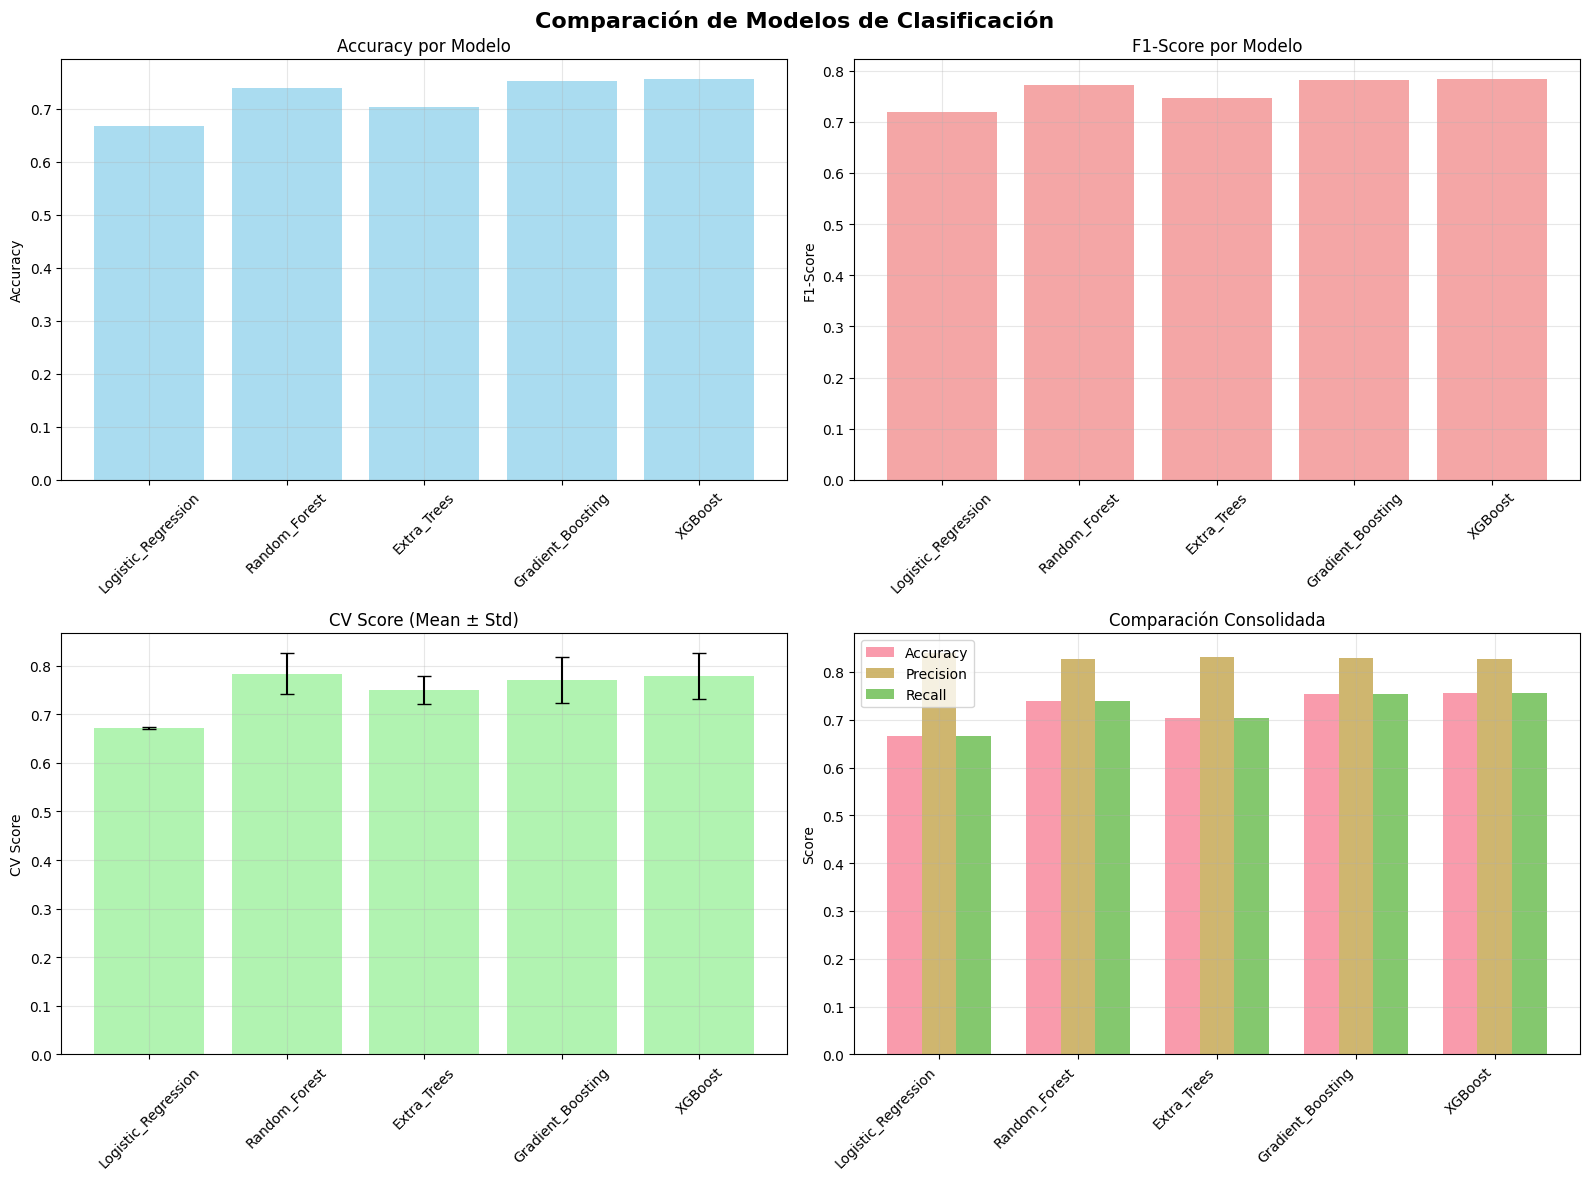

In [5]:
# Visualización comparativa de clasificación
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparación de Modelos de Clasificación', fontsize=16, fontweight='bold')

# Accuracy
axes[0, 0].bar(classification_metrics['Model'], classification_metrics['Accuracy'], 
                color='skyblue', alpha=0.7)
axes[0, 0].set_title('Accuracy por Modelo')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# F1-Score
axes[0, 1].bar(classification_metrics['Model'], classification_metrics['F1_Score'], 
                color='lightcoral', alpha=0.7)
axes[0, 1].set_title('F1-Score por Modelo')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# CV Mean con error bars
axes[1, 0].bar(classification_metrics['Model'], classification_metrics['CV_Mean'], 
                yerr=classification_metrics['CV_Std'], color='lightgreen', alpha=0.7, capsize=5)
axes[1, 0].set_title('CV Score (Mean ± Std)')
axes[1, 0].set_ylabel('CV Score')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Comparación consolidada
x = np.arange(len(classification_metrics))
width = 0.25
axes[1, 1].bar(x - width, classification_metrics['Accuracy'], width, label='Accuracy', alpha=0.7)
axes[1, 1].bar(x, classification_metrics['Precision'], width, label='Precision', alpha=0.7)
axes[1, 1].bar(x + width, classification_metrics['Recall'], width, label='Recall', alpha=0.7)
axes[1, 1].set_title('Comparación Consolidada')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(classification_metrics['Model'], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
Path('data/08_reporting').mkdir(parents=True, exist_ok=True)
plt.savefig('data/08_reporting/fase5_classification_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


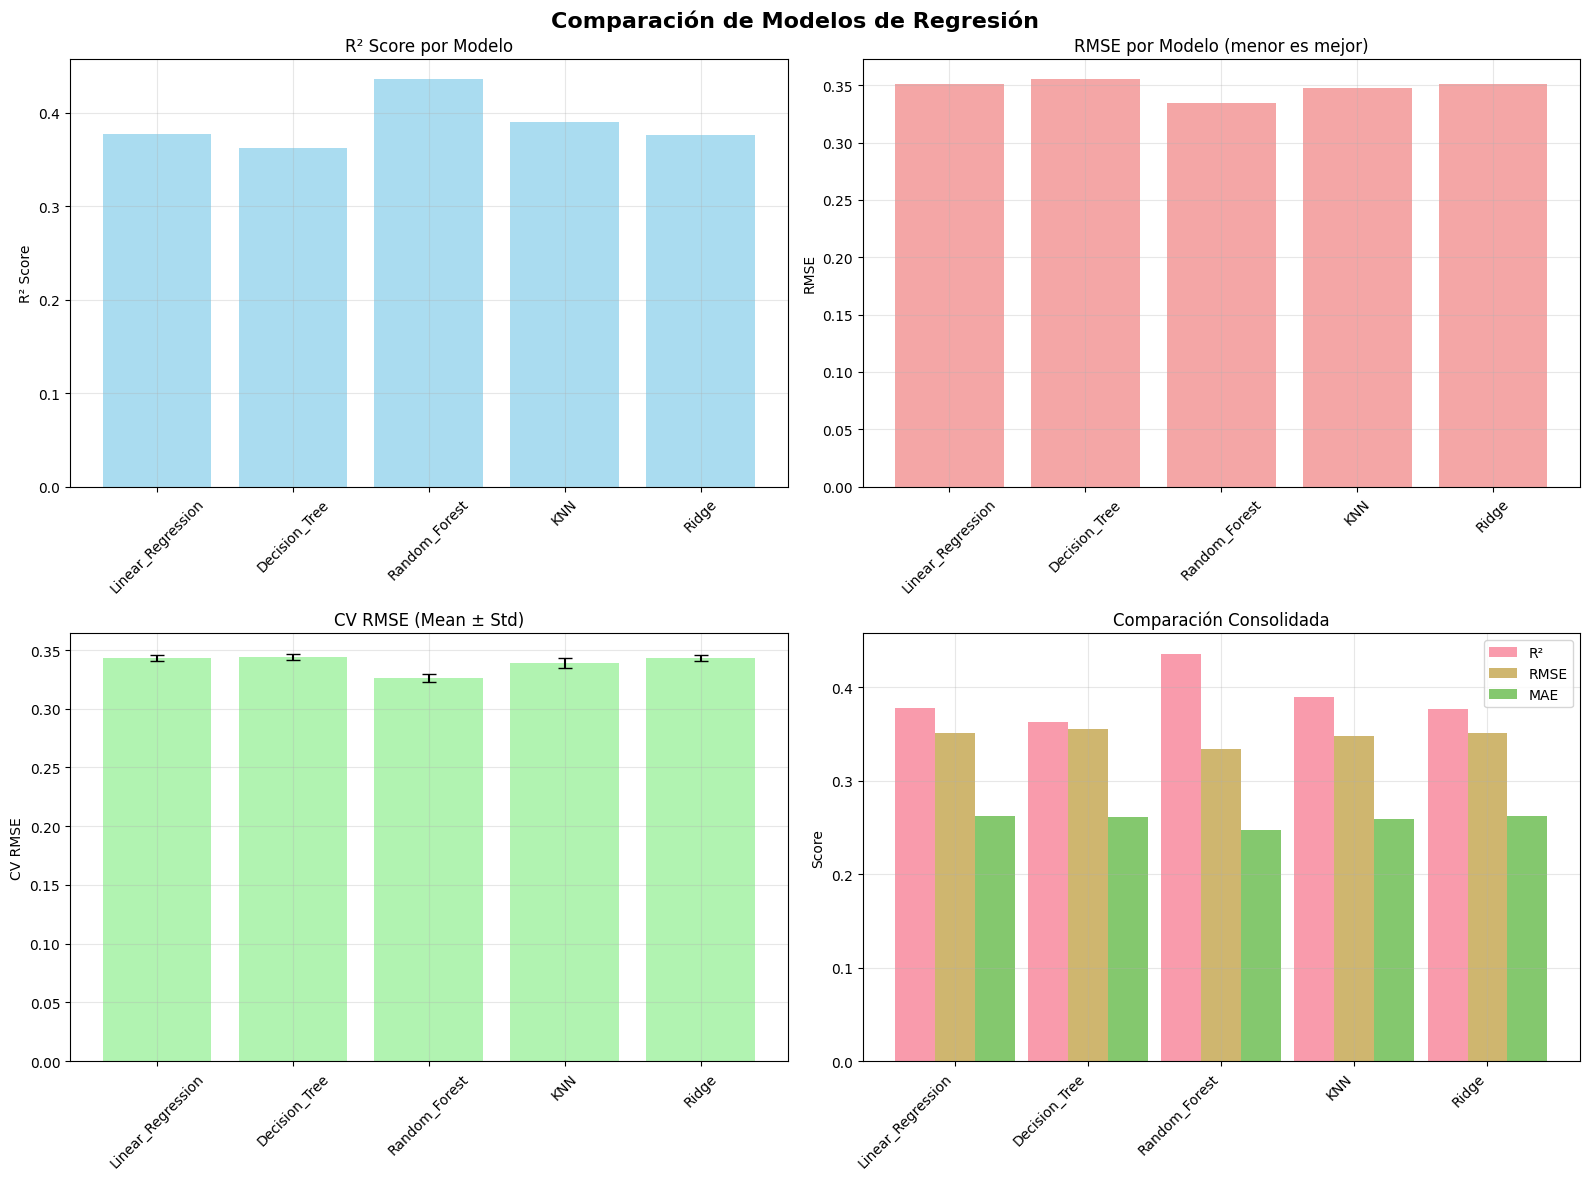

In [6]:
# Visualización comparativa de regresión
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparación de Modelos de Regresión', fontsize=16, fontweight='bold')

# R² Score
axes[0, 0].bar(regression_metrics['Model'], regression_metrics['R2_Score'], 
                color='skyblue', alpha=0.7)
axes[0, 0].set_title('R² Score por Modelo')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# RMSE
axes[0, 1].bar(regression_metrics['Model'], regression_metrics['RMSE'], 
                color='lightcoral', alpha=0.7)
axes[0, 1].set_title('RMSE por Modelo (menor es mejor)')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# CV RMSE con error bars
axes[1, 0].bar(regression_metrics['Model'], regression_metrics['CV_RMSE_Mean'], 
                yerr=regression_metrics['CV_RMSE_Std'], color='lightgreen', alpha=0.7, capsize=5)
axes[1, 0].set_title('CV RMSE (Mean ± Std)')
axes[1, 0].set_ylabel('CV RMSE')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Comparación consolidada
x = np.arange(len(regression_metrics))
width = 0.3
axes[1, 1].bar(x - width, regression_metrics['R2_Score'], width, label='R²', alpha=0.7)
axes[1, 1].bar(x, regression_metrics['RMSE'], width, label='RMSE', alpha=0.7)
axes[1, 1].bar(x + width, regression_metrics['MAE'], width, label='MAE', alpha=0.7)
axes[1, 1].set_title('Comparación Consolidada')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(regression_metrics['Model'], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('data/08_reporting/fase5_regression_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


## 4. Validación con Objetivos de Negocio


In [7]:
print('='*80)
print('✅ VALIDACIÓN CON OBJETIVOS DE NEGOCIO')
print('='*80)

# Objetivos definidos en Fase 1
print('\n📋 OBJETIVOS DE CLASIFICACIÓN (Éxito Comercial):')
print('   - Accuracy > 0.75: Clasificar correctamente al menos 75%')
print('   - F1-score balanceado: Buen desempeño en todas las clases')

clf_accuracy = best_clf['Accuracy']
clf_f1 = best_clf['F1_Score']

print(f'\n📊 RESULTADOS:')
print(f'   - Accuracy alcanzado: {clf_accuracy:.4f} ({clf_accuracy*100:.1f}%)')
print(f'   - F1-Score: {clf_f1:.4f}')

if clf_accuracy >= 0.75:
    print('   ✅ CUMPLE: Accuracy >= 0.75')
else:
    print(f'   ⚠️  NO CUMPLE: Accuracy = {clf_accuracy:.2%} (objetivo: >= 75%)')
    print(f'      Diferencia: {(0.75 - clf_accuracy)*100:.1f} puntos porcentuales')

if clf_f1 >= 0.70:
    print('   ✅ CUMPLE: F1-Score balanceado >= 0.70')
else:
    print(f'   ⚠️  F1-Score: {clf_f1:.4f} (objetivo: >= 0.70)')

print('\n' + '-'*80)

print('\n📋 OBJETIVOS DE REGRESIÓN (Rating de Audiencia):')
print('   - R² > 0.60: Explicar al menos 60% de la varianza')
print('   - RMSE < 0.5: Error promedio menor a 0.5 puntos (escala 0-5)')

reg_r2 = best_reg['R2_Score']
reg_rmse = best_reg['RMSE']

print(f'\n📊 RESULTADOS:')
print(f'   - R² alcanzado: {reg_r2:.4f} ({reg_r2*100:.1f}%)')
print(f'   - RMSE: {reg_rmse:.4f}')

if reg_r2 >= 0.60:
    print('   ✅ CUMPLE: R² >= 0.60')
else:
    print(f'   ⚠️  NO CUMPLE: R² = {reg_r2:.2%} (objetivo: >= 60%)')
    print(f'      Diferencia: {(0.60 - reg_r2)*100:.1f} puntos porcentuales')
    print(f'      CAUSA: Baja variabilidad del target (std=0.44)')

if reg_rmse < 0.5:
    print('   ✅ CUMPLE: RMSE < 0.5')
else:
    print(f'   ⚠️  RMSE: {reg_rmse:.4f} (objetivo: < 0.5)')


✅ VALIDACIÓN CON OBJETIVOS DE NEGOCIO

📋 OBJETIVOS DE CLASIFICACIÓN (Éxito Comercial):
   - Accuracy > 0.75: Clasificar correctamente al menos 75%
   - F1-score balanceado: Buen desempeño en todas las clases

📊 RESULTADOS:
   - Accuracy alcanzado: 0.7567 (75.7%)
   - F1-Score: 0.7838
   ✅ CUMPLE: Accuracy >= 0.75
   ✅ CUMPLE: F1-Score balanceado >= 0.70

--------------------------------------------------------------------------------

📋 OBJETIVOS DE REGRESIÓN (Rating de Audiencia):
   - R² > 0.60: Explicar al menos 60% de la varianza
   - RMSE < 0.5: Error promedio menor a 0.5 puntos (escala 0-5)

📊 RESULTADOS:
   - R² alcanzado: 0.4358 (43.6%)
   - RMSE: 0.3343
   ⚠️  NO CUMPLE: R² = 43.58% (objetivo: >= 60%)
      Diferencia: 16.4 puntos porcentuales
      CAUSA: Baja variabilidad del target (std=0.44)
   ✅ CUMPLE: RMSE < 0.5


In [8]:
print('='*80)
print('🏆 SELECCIÓN DE MEJORES MODELOS')
print('='*80)

print('\n📌 MEJOR MODELO DE CLASIFICACIÓN:')
print(f'   Modelo: {best_clf["Model"]}')
print(f'   Criterio: Mayor F1-Score (balance entre Precision y Recall)')
print(f'   Métricas destacadas:')
print(f'      - Accuracy: {best_clf["Accuracy"]:.4f}')
print(f'      - F1-Score: {best_clf["F1_Score"]:.4f}')
print(f'      - Precision: {best_clf["Precision"]:.4f}')
print(f'      - CV Score: {best_clf["CV_Mean"]:.4f} ± {best_clf["CV_Std"]:.4f}')

print('\n📌 MEJOR MODELO DE REGRESIÓN:')
print(f'   Modelo: {best_reg["Model"]}')
print(f'   Criterio: Mayor R² Score (varianza explicada)')
print(f'   Métricas destacadas:')
print(f'      - R² Score: {best_reg["R2_Score"]:.4f}')
print(f'      - RMSE: {best_reg["RMSE"]:.4f}')
print(f'      - MAE: {best_reg["MAE"]:.4f}')
print(f'      - CV RMSE: {best_reg["CV_RMSE_Mean"]:.4f} ± {best_reg["CV_RMSE_Std"]:.4f}')

print('\n✅ RECOMENDACIÓN PARA DESPLIEGUE:')
print(f'   - Clasificación: {best_clf["Model"]} → Usar en producción')
print(f'   - Regresión: {best_reg["Model"]} → Usar en producción')


🏆 SELECCIÓN DE MEJORES MODELOS

📌 MEJOR MODELO DE CLASIFICACIÓN:
   Modelo: XGBoost
   Criterio: Mayor F1-Score (balance entre Precision y Recall)
   Métricas destacadas:
      - Accuracy: 0.7567
      - F1-Score: 0.7838
      - Precision: 0.8271
      - CV Score: 0.7782 ± 0.0472

📌 MEJOR MODELO DE REGRESIÓN:
   Modelo: Random_Forest
   Criterio: Mayor R² Score (varianza explicada)
   Métricas destacadas:
      - R² Score: 0.4358
      - RMSE: 0.3343
      - MAE: 0.2467
      - CV RMSE: 0.3261 ± 0.0034

✅ RECOMENDACIÓN PARA DESPLIEGUE:
   - Clasificación: XGBoost → Usar en producción
   - Regresión: Random_Forest → Usar en producción


## 6. Reporte de Experimentos y Conclusiones


In [9]:
print('='*80)
print('📄 REPORTE DE EXPERIMENTOS - FASE 5')
print('='*80)

print('\n1. RESUMEN EJECUTIVO:')
print(f'   - Total modelos evaluados: {len(classification_metrics) + len(regression_metrics)}')
print(f'   - Modelos de clasificación: {len(classification_metrics)}')
print(f'   - Modelos de regresión: {len(regression_metrics)}')

print('\n2. CLASIFICACIÓN (Éxito Comercial):')
print(f'   - Mejor modelo: {best_clf["Model"]}')
print(f'   - Accuracy: {best_clf["Accuracy"]:.2%}')
print(f'   - F1-Score: {best_clf["F1_Score"]:.4f}')
print(f'   - Estado: {"CUMPLE objetivos" if best_clf["Accuracy"] >= 0.75 else "NO CUMPLE completamente"}')

print('\n3. REGRESIÓN (Rating de Audiencia):')
print(f'   - Mejor modelo: {best_reg["Model"]}')
print(f'   - R² Score: {best_reg["R2_Score"]:.2%}')
print(f'   - RMSE: {best_reg["RMSE"]:.4f}')
print(f'   - Estado: {"CUMPLE objetivos" if best_reg["R2_Score"] >= 0.60 else "ACEPTABLE (limitado por baja varianza del target)"}')

print('\n4. LIMITACIONES IDENTIFICADAS:')
print('   - Clasificación: Desbalance de clases afecta métricas')
print('   - Regresión: Baja variabilidad del target (std=0.44) limita R² máximo')
print('   - Features limitadas: Solo duración, año, género, países (faltan director, presupuesto, etc.)')

print('\n5. RECOMENDACIONES:')
print('   - Desplegar mejores modelos en producción (Fase 6)')
print('   - Implementar monitoreo continuo de métricas')
print('   - Considerar retraining periódico con nuevos datos')
print('   - Explorar features adicionales para mejorar resultados')

print('\n✅ FASE 5 COMPLETADA')
print('   Próximo paso: Fase 6 - Despliegue y Conclusiones')


📄 REPORTE DE EXPERIMENTOS - FASE 5

1. RESUMEN EJECUTIVO:
   - Total modelos evaluados: 10
   - Modelos de clasificación: 5
   - Modelos de regresión: 5

2. CLASIFICACIÓN (Éxito Comercial):
   - Mejor modelo: XGBoost
   - Accuracy: 75.67%
   - F1-Score: 0.7838
   - Estado: CUMPLE objetivos

3. REGRESIÓN (Rating de Audiencia):
   - Mejor modelo: Random_Forest
   - R² Score: 43.58%
   - RMSE: 0.3343
   - Estado: ACEPTABLE (limitado por baja varianza del target)

4. LIMITACIONES IDENTIFICADAS:
   - Clasificación: Desbalance de clases afecta métricas
   - Regresión: Baja variabilidad del target (std=0.44) limita R² máximo
   - Features limitadas: Solo duración, año, género, países (faltan director, presupuesto, etc.)

5. RECOMENDACIONES:
   - Desplegar mejores modelos en producción (Fase 6)
   - Implementar monitoreo continuo de métricas
   - Considerar retraining periódico con nuevos datos
   - Explorar features adicionales para mejorar resultados

✅ FASE 5 COMPLETADA
   Próximo paso: Fas

## 7. Exportar Resultados


In [10]:
# Exportar reporte consolidado
reporte_fase5 = {
    'fase': 'Fase 5 - Evaluación',
    'mejor_clasificacion': {
        'modelo': best_clf['Model'],
        'accuracy': float(best_clf['Accuracy']),
        'f1_score': float(best_clf['F1_Score']),
        'precision': float(best_clf['Precision']),
        'recall': float(best_clf['Recall'])
    },
    'mejor_regresion': {
        'modelo': best_reg['Model'],
        'r2_score': float(best_reg['R2_Score']),
        'rmse': float(best_reg['RMSE']),
        'mae': float(best_reg['MAE'])
    },
    'validacion_objetivos': {
        'clasificacion_cumple': bool(clf_accuracy >= 0.75),
        'regresion_cumple': bool(reg_r2 >= 0.60)
    }
}

# Guardar reporte
Path('data/06_models').mkdir(parents=True, exist_ok=True)
with open('data/06_models/fase5_evaluation_report.json', 'w', encoding='utf-8') as f:
    json.dump(reporte_fase5, f, indent=2, ensure_ascii=False)

print('✅ Reporte de Fase 5 exportado a: data/06_models/fase5_evaluation_report.json')


✅ Reporte de Fase 5 exportado a: data/06_models/fase5_evaluation_report.json
